# Obtain and Prepare Stock Data from Alpha Vantage API
# to Feed Azure Anomaly Detector API

Install Alpha Vantage Package

Read detail API documentation : https://www.alphavantage.co/documentation/

In [37]:
#!pip install alpha_vantage

Obtain Pandas Dataframe from Alpha Vantage API

Let's obtain weekly stock performance data of Twitter (TWTR)

In [38]:
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='AX8ZS33OG0EFQ5C3', output_format='pandas')  # pandas

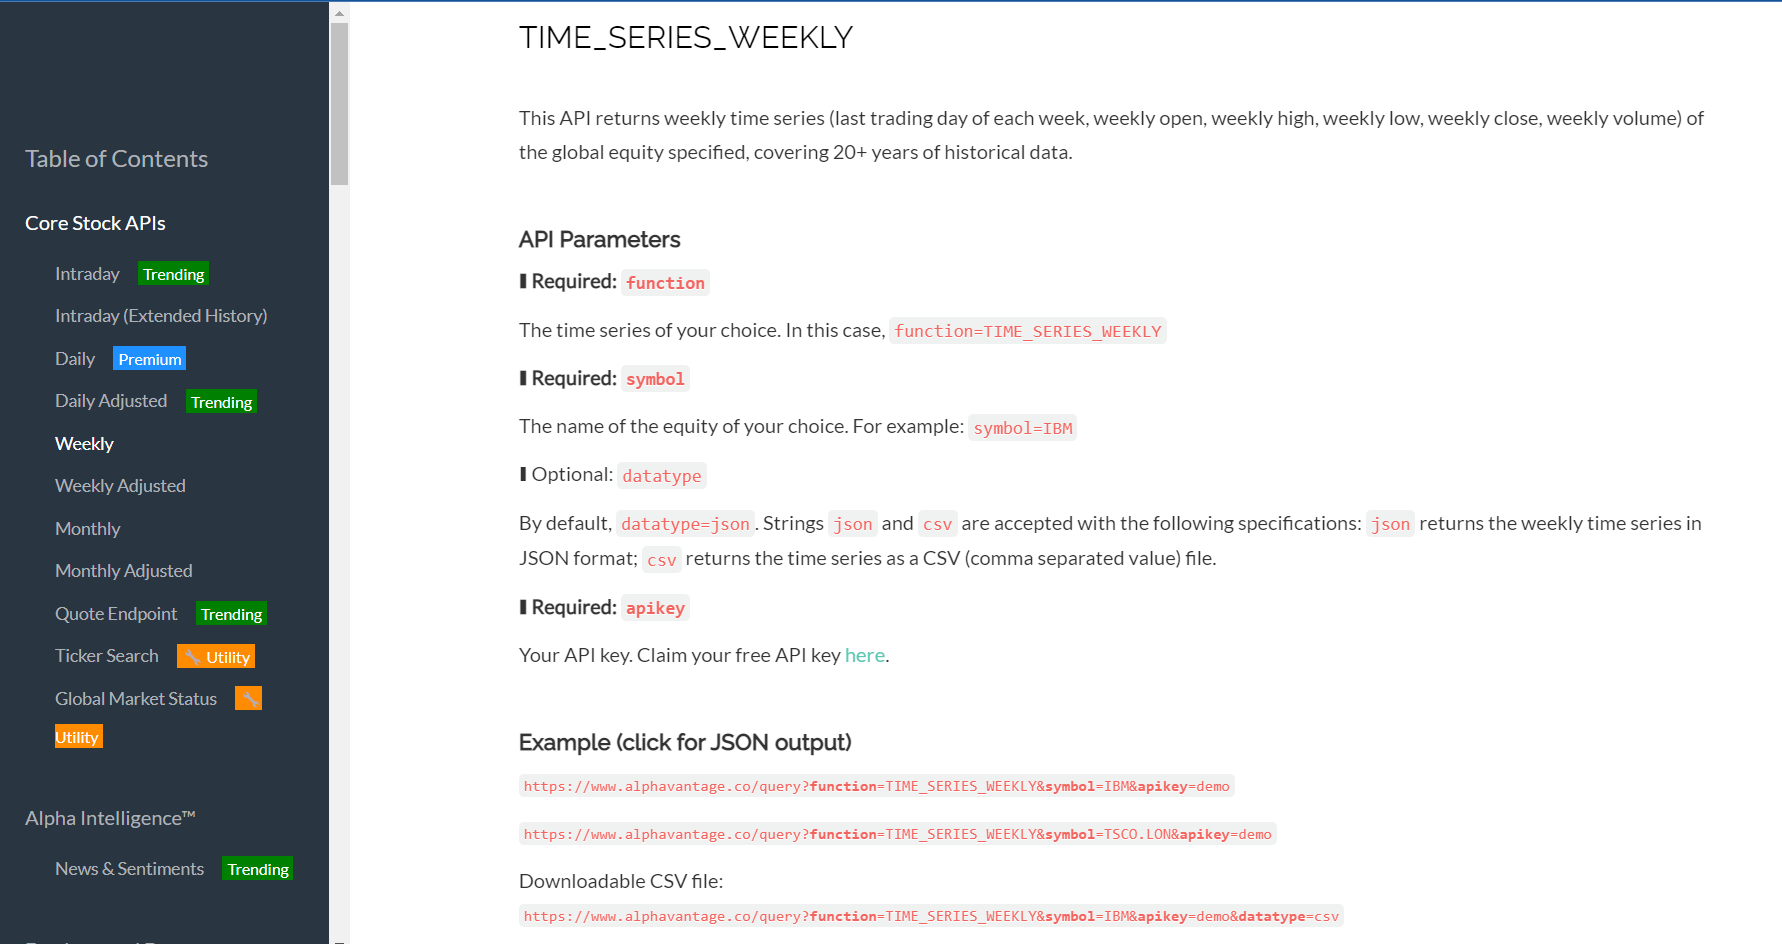

In [1]:
from IPython.display import Image

Image("images/alpha.png")


In [39]:
company_code = input("Enter stock code: (Enter 'TWTR' for Twitter)")
df, meta_data = ts.get_weekly(symbol=company_code)
print(df.head())

            1. open  2. high  3. low  4. close    5. volume
date                                                       
2022-10-28    50.71    54.00   50.52     53.70  226961882.0
2022-10-21    50.50    52.70   49.55     49.89  119363153.0
2022-10-14    49.66    51.07   49.50     50.45   74444265.0
2022-10-07    43.90    52.30   42.23     49.18  240992098.0
2022-09-30    41.50    44.66   40.66     43.84   80150194.0


Reset Dataframe Index

In [40]:
df.reset_index(inplace=True)
print(df.head())

        date  1. open  2. high  3. low  4. close    5. volume
0 2022-10-28    50.71    54.00   50.52     53.70  226961882.0
1 2022-10-21    50.50    52.70   49.55     49.89  119363153.0
2 2022-10-14    49.66    51.07   49.50     50.45   74444265.0
3 2022-10-07    43.90    52.30   42.23     49.18  240992098.0
4 2022-09-30    41.50    44.66   40.66     43.84   80150194.0


Drop unnecessary columns from Dataframe, we only look into close value as an example.

In [41]:
df.drop('1. open', axis=1, inplace=True)
df.drop('5. volume', axis=1, inplace=True)
df.drop('3. low', axis=1, inplace=True)
df.drop('2. high', axis=1, inplace=True)
print(df.head())

        date  4. close
0 2022-10-28     53.70
1 2022-10-21     49.89
2 2022-10-14     50.45
3 2022-10-07     49.18
4 2022-09-30     43.84


Rename Dataframe columns name

In [42]:
df.rename(columns={'date':'timestamp','4. close':'value'}, inplace=True)
print(df.head())

   timestamp  value
0 2022-10-28  53.70
1 2022-10-21  49.89
2 2022-10-14  50.45
3 2022-10-07  49.18
4 2022-09-30  43.84


Sort Dataframe timestamp column

Count number of row in Dataframe

In [43]:
df.count()

timestamp    468
value        468
dtype: int64

Drop unnecessary rows from Dataframe, we only look into latest 48 weeks (1 year) data as an example.

In [44]:
df.drop(df.index[49:], inplace=True)

In [45]:
print(df)

    timestamp  value
0  2022-10-28  53.70
1  2022-10-21  49.89
2  2022-10-14  50.45
3  2022-10-07  49.18
4  2022-09-30  43.84
5  2022-09-23  41.58
6  2022-09-16  41.45
7  2022-09-09  42.19
8  2022-09-02  38.63
9  2022-08-26  40.46
10 2022-08-19  43.99
11 2022-08-12  44.26
12 2022-08-05  42.52
13 2022-07-29  41.61
14 2022-07-22  39.84
15 2022-07-15  37.74
16 2022-07-08  36.81
17 2022-07-01  38.23
18 2022-06-24  39.41
19 2022-06-17  37.78
20 2022-06-10  38.98
21 2022-06-03  40.16
22 2022-05-27  40.17
23 2022-05-20  38.29
24 2022-05-13  40.72
25 2022-05-06  49.80
26 2022-04-29  49.02
27 2022-04-22  48.93
28 2022-04-14  45.08
29 2022-04-08  46.23
30 2022-04-01  39.31
31 2022-03-25  38.60
32 2022-03-18  37.77
33 2022-03-11  33.00
34 2022-03-04  33.39
35 2022-02-25  35.29
36 2022-02-18  34.32
37 2022-02-11  35.84
38 2022-02-04  36.94
39 2022-01-28  35.27
40 2022-01-21  34.82
41 2022-01-14  38.44
42 2022-01-07  39.67
43 2021-12-31  43.22
44 2021-12-23  44.16
45 2021-12-17  43.07
46 2021-12-10

In [46]:
df.sort_values(by=['timestamp'], inplace=True)
print(df.head())

    timestamp  value
48 2021-11-26  47.07
47 2021-12-03  42.07
46 2021-12-10  45.56
45 2021-12-17  43.07
44 2021-12-23  44.16


Drop current week data

In [47]:
df.drop(df.index[48], inplace=True)

In [48]:
print(df)

    timestamp  value
48 2021-11-26  47.07
47 2021-12-03  42.07
46 2021-12-10  45.56
45 2021-12-17  43.07
44 2021-12-23  44.16
43 2021-12-31  43.22
42 2022-01-07  39.67
41 2022-01-14  38.44
40 2022-01-21  34.82
39 2022-01-28  35.27
38 2022-02-04  36.94
37 2022-02-11  35.84
36 2022-02-18  34.32
35 2022-02-25  35.29
34 2022-03-04  33.39
33 2022-03-11  33.00
32 2022-03-18  37.77
31 2022-03-25  38.60
30 2022-04-01  39.31
29 2022-04-08  46.23
28 2022-04-14  45.08
27 2022-04-22  48.93
26 2022-04-29  49.02
25 2022-05-06  49.80
24 2022-05-13  40.72
23 2022-05-20  38.29
22 2022-05-27  40.17
21 2022-06-03  40.16
20 2022-06-10  38.98
19 2022-06-17  37.78
18 2022-06-24  39.41
17 2022-07-01  38.23
16 2022-07-08  36.81
15 2022-07-15  37.74
14 2022-07-22  39.84
13 2022-07-29  41.61
12 2022-08-05  42.52
11 2022-08-12  44.26
10 2022-08-19  43.99
9  2022-08-26  40.46
8  2022-09-02  38.63
7  2022-09-09  42.19
6  2022-09-16  41.45
5  2022-09-23  41.58
4  2022-09-30  43.84
3  2022-10-07  49.18
2  2022-10-14

In [49]:
df.count()

timestamp    48
value        48
dtype: int64

In [50]:
print(df.head())

    timestamp  value
48 2021-11-26  47.07
47 2021-12-03  42.07
46 2021-12-10  45.56
45 2021-12-17  43.07
44 2021-12-23  44.16


In [51]:
from datetime import timedelta

import pandas as pd

# Assuming your DataFrame is named "df" with columns "timestamp" and "value"
# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Get the first date (max date since the dates are in descending order)
first_date = df['timestamp'].max()

# Create a new column 'new_timestamp' with adjusted dates exactly one week apart
df['new_timestamp'] = first_date - pd.to_timedelta(df.index * 7, unit='D')+timedelta(days=7)

# Sort the DataFrame by the 'new_timestamp' column in ascending order
df.sort_values('new_timestamp', inplace=True)
#replace the old timestamp column with the new one
df['timestamp'] = df['new_timestamp']
#drop the new_timestamp column
df.drop('new_timestamp', axis=1, inplace=True)

# Print the updated DataFrame
print(df)

    timestamp  value
48 2021-11-26  47.07
47 2021-12-03  42.07
46 2021-12-10  45.56
45 2021-12-17  43.07
44 2021-12-24  44.16
43 2021-12-31  43.22
42 2022-01-07  39.67
41 2022-01-14  38.44
40 2022-01-21  34.82
39 2022-01-28  35.27
38 2022-02-04  36.94
37 2022-02-11  35.84
36 2022-02-18  34.32
35 2022-02-25  35.29
34 2022-03-04  33.39
33 2022-03-11  33.00
32 2022-03-18  37.77
31 2022-03-25  38.60
30 2022-04-01  39.31
29 2022-04-08  46.23
28 2022-04-15  45.08
27 2022-04-22  48.93
26 2022-04-29  49.02
25 2022-05-06  49.80
24 2022-05-13  40.72
23 2022-05-20  38.29
22 2022-05-27  40.17
21 2022-06-03  40.16
20 2022-06-10  38.98
19 2022-06-17  37.78
18 2022-06-24  39.41
17 2022-07-01  38.23
16 2022-07-08  36.81
15 2022-07-15  37.74
14 2022-07-22  39.84
13 2022-07-29  41.61
12 2022-08-05  42.52
11 2022-08-12  44.26
10 2022-08-19  43.99
9  2022-08-26  40.46
8  2022-09-02  38.63
7  2022-09-09  42.19
6  2022-09-16  41.45
5  2022-09-23  41.58
4  2022-09-30  43.84
3  2022-10-07  49.18
2  2022-10-14

Add specific datetime format in timestamp column

In [52]:
df['timestamp'] = df['timestamp'].astype(str) + 'T00:00:00Z'

Round up value in valume column

In [53]:
decimals = 0
df['value'] = df['value'].apply(lambda x: round(x))

In [54]:
print(df.head())

               timestamp  value
48  2021-11-26T00:00:00Z     47
47  2021-12-03T00:00:00Z     42
46  2021-12-10T00:00:00Z     46
45  2021-12-17T00:00:00Z     43
44  2021-12-24T00:00:00Z     44


Export Dataframe to JSON file

In [55]:
df.to_json (r'stockdatafromav.json',orient='records')

Trying to import JSON data

In [56]:
import json

stock_data_from_av = json.load(open('stockdatafromav.json'))
print(stock_data_from_av)

[{'timestamp': '2021-11-26T00:00:00Z', 'value': 47}, {'timestamp': '2021-12-03T00:00:00Z', 'value': 42}, {'timestamp': '2021-12-10T00:00:00Z', 'value': 46}, {'timestamp': '2021-12-17T00:00:00Z', 'value': 43}, {'timestamp': '2021-12-24T00:00:00Z', 'value': 44}, {'timestamp': '2021-12-31T00:00:00Z', 'value': 43}, {'timestamp': '2022-01-07T00:00:00Z', 'value': 40}, {'timestamp': '2022-01-14T00:00:00Z', 'value': 38}, {'timestamp': '2022-01-21T00:00:00Z', 'value': 35}, {'timestamp': '2022-01-28T00:00:00Z', 'value': 35}, {'timestamp': '2022-02-04T00:00:00Z', 'value': 37}, {'timestamp': '2022-02-11T00:00:00Z', 'value': 36}, {'timestamp': '2022-02-18T00:00:00Z', 'value': 34}, {'timestamp': '2022-02-25T00:00:00Z', 'value': 35}, {'timestamp': '2022-03-04T00:00:00Z', 'value': 33}, {'timestamp': '2022-03-11T00:00:00Z', 'value': 33}, {'timestamp': '2022-03-18T00:00:00Z', 'value': 38}, {'timestamp': '2022-03-25T00:00:00Z', 'value': 39}, {'timestamp': '2022-04-01T00:00:00Z', 'value': 39}, {'timestamp

Read JSON data from filesystem

In [57]:
with open(r"stockdatafromav.json", "r+") as f:
    rjsoninfile = f.read()
    print(rjsoninfile)

[{"timestamp":"2021-11-26T00:00:00Z","value":47},{"timestamp":"2021-12-03T00:00:00Z","value":42},{"timestamp":"2021-12-10T00:00:00Z","value":46},{"timestamp":"2021-12-17T00:00:00Z","value":43},{"timestamp":"2021-12-24T00:00:00Z","value":44},{"timestamp":"2021-12-31T00:00:00Z","value":43},{"timestamp":"2022-01-07T00:00:00Z","value":40},{"timestamp":"2022-01-14T00:00:00Z","value":38},{"timestamp":"2022-01-21T00:00:00Z","value":35},{"timestamp":"2022-01-28T00:00:00Z","value":35},{"timestamp":"2022-02-04T00:00:00Z","value":37},{"timestamp":"2022-02-11T00:00:00Z","value":36},{"timestamp":"2022-02-18T00:00:00Z","value":34},{"timestamp":"2022-02-25T00:00:00Z","value":35},{"timestamp":"2022-03-04T00:00:00Z","value":33},{"timestamp":"2022-03-11T00:00:00Z","value":33},{"timestamp":"2022-03-18T00:00:00Z","value":38},{"timestamp":"2022-03-25T00:00:00Z","value":39},{"timestamp":"2022-04-01T00:00:00Z","value":39},{"timestamp":"2022-04-08T00:00:00Z","value":46},{"timestamp":"2022-04-15T00:00:00Z","va

Adding some specific prefix to fit Anomaly Detector API format

In [58]:
with open(r"stockdatafromav.json", "w+") as f:
        f.write("{\"granularity\": \"weekly\", \"series\": " + rjsoninfile)
with open(r"stockdatafromav.json", "r+") as f:
        rjsoninfilea = f.read()
        print(rjsoninfilea)

{"granularity": "weekly", "series": [{"timestamp":"2021-11-26T00:00:00Z","value":47},{"timestamp":"2021-12-03T00:00:00Z","value":42},{"timestamp":"2021-12-10T00:00:00Z","value":46},{"timestamp":"2021-12-17T00:00:00Z","value":43},{"timestamp":"2021-12-24T00:00:00Z","value":44},{"timestamp":"2021-12-31T00:00:00Z","value":43},{"timestamp":"2022-01-07T00:00:00Z","value":40},{"timestamp":"2022-01-14T00:00:00Z","value":38},{"timestamp":"2022-01-21T00:00:00Z","value":35},{"timestamp":"2022-01-28T00:00:00Z","value":35},{"timestamp":"2022-02-04T00:00:00Z","value":37},{"timestamp":"2022-02-11T00:00:00Z","value":36},{"timestamp":"2022-02-18T00:00:00Z","value":34},{"timestamp":"2022-02-25T00:00:00Z","value":35},{"timestamp":"2022-03-04T00:00:00Z","value":33},{"timestamp":"2022-03-11T00:00:00Z","value":33},{"timestamp":"2022-03-18T00:00:00Z","value":38},{"timestamp":"2022-03-25T00:00:00Z","value":39},{"timestamp":"2022-04-01T00:00:00Z","value":39},{"timestamp":"2022-04-08T00:00:00Z","value":46},{"t

Adding some specfic suffix to fit Anomaly Detector API format

In [59]:
with open(r"stockdatafromav.json", "w+") as f:
        f.write(rjsoninfilea + "}")
with open(r"stockdatafromav.json", "r+") as f:
        rjsoninfileb = f.read()
        print(rjsoninfileb)

{"granularity": "weekly", "series": [{"timestamp":"2021-11-26T00:00:00Z","value":47},{"timestamp":"2021-12-03T00:00:00Z","value":42},{"timestamp":"2021-12-10T00:00:00Z","value":46},{"timestamp":"2021-12-17T00:00:00Z","value":43},{"timestamp":"2021-12-24T00:00:00Z","value":44},{"timestamp":"2021-12-31T00:00:00Z","value":43},{"timestamp":"2022-01-07T00:00:00Z","value":40},{"timestamp":"2022-01-14T00:00:00Z","value":38},{"timestamp":"2022-01-21T00:00:00Z","value":35},{"timestamp":"2022-01-28T00:00:00Z","value":35},{"timestamp":"2022-02-04T00:00:00Z","value":37},{"timestamp":"2022-02-11T00:00:00Z","value":36},{"timestamp":"2022-02-18T00:00:00Z","value":34},{"timestamp":"2022-02-25T00:00:00Z","value":35},{"timestamp":"2022-03-04T00:00:00Z","value":33},{"timestamp":"2022-03-11T00:00:00Z","value":33},{"timestamp":"2022-03-18T00:00:00Z","value":38},{"timestamp":"2022-03-25T00:00:00Z","value":39},{"timestamp":"2022-04-01T00:00:00Z","value":39},{"timestamp":"2022-04-08T00:00:00Z","value":46},{"t

Trying to import JSON data again

In [60]:
import json

stock_data_from_av = json.load(open('stockdatafromav.json'))
print(stock_data_from_av)

{'granularity': 'weekly', 'series': [{'timestamp': '2021-11-26T00:00:00Z', 'value': 47}, {'timestamp': '2021-12-03T00:00:00Z', 'value': 42}, {'timestamp': '2021-12-10T00:00:00Z', 'value': 46}, {'timestamp': '2021-12-17T00:00:00Z', 'value': 43}, {'timestamp': '2021-12-24T00:00:00Z', 'value': 44}, {'timestamp': '2021-12-31T00:00:00Z', 'value': 43}, {'timestamp': '2022-01-07T00:00:00Z', 'value': 40}, {'timestamp': '2022-01-14T00:00:00Z', 'value': 38}, {'timestamp': '2022-01-21T00:00:00Z', 'value': 35}, {'timestamp': '2022-01-28T00:00:00Z', 'value': 35}, {'timestamp': '2022-02-04T00:00:00Z', 'value': 37}, {'timestamp': '2022-02-11T00:00:00Z', 'value': 36}, {'timestamp': '2022-02-18T00:00:00Z', 'value': 34}, {'timestamp': '2022-02-25T00:00:00Z', 'value': 35}, {'timestamp': '2022-03-04T00:00:00Z', 'value': 33}, {'timestamp': '2022-03-11T00:00:00Z', 'value': 33}, {'timestamp': '2022-03-18T00:00:00Z', 'value': 38}, {'timestamp': '2022-03-25T00:00:00Z', 'value': 39}, {'timestamp': '2022-04-01T0

All Done!